In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_data = pd.read_csv('/content/tested.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_data.shape

(418, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [9]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [32]:
print(titanic_data['Embarked'].mode()[0])

0


In [33]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [34]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [35]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.907576,0.685516
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [36]:
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

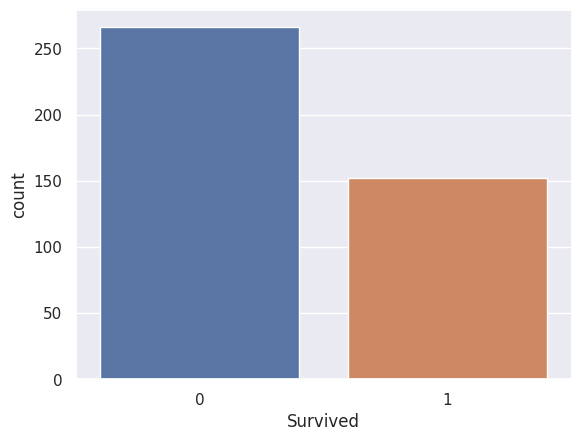

In [37]:
sns.set()
sns.countplot(x = 'Survived', data = titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

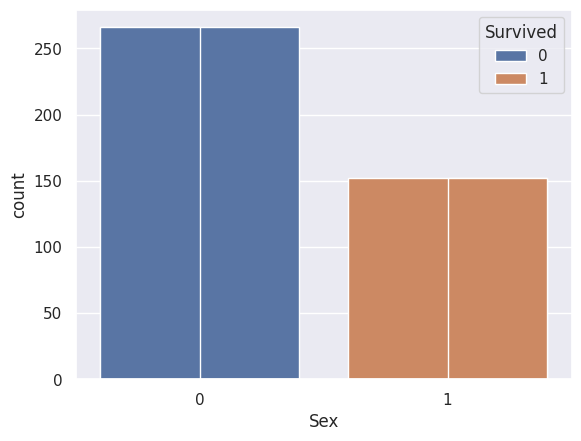

In [38]:
titanic_data['Sex'].value_counts()

sns.countplot(x = 'Sex', data=titanic_data)

sns.countplot(x = 'Sex', hue='Survived', data=titanic_data)


In [39]:
titanic_data['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [40]:
titanic_data['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [41]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [49]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived','Fare'],axis=1)
Y = titanic_data['Survived']

In [50]:
print(X)

     Pclass  Sex       Age  SibSp  Parch  Embarked
0         3    0  34.50000      0      0         2
1         3    1  47.00000      1      0         0
2         2    0  62.00000      0      0         2
3         3    0  27.00000      0      0         0
4         3    1  22.00000      1      1         0
..      ...  ...       ...    ...    ...       ...
413       3    0  30.27259      0      0         0
414       1    1  39.00000      0      0         1
415       3    0  38.50000      0      0         0
416       3    0  30.27259      0      0         0
417       3    0  30.27259      1      1         1

[418 rows x 6 columns]


In [51]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=2)

In [53]:
print(X_train)

     Pclass  Sex       Age  SibSp  Parch  Embarked
94        1    0  25.00000      0      0         1
165       3    1  26.00000      1      1         0
364       1    1  25.00000      1      0         1
297       3    0  30.27259      2      0         1
270       1    0  46.00000      0      0         1
..      ...  ...       ...    ...    ...       ...
299       3    0  29.00000      0      0         0
22        1    1  30.27259      0      0         0
72        3    1  29.00000      0      0         0
15        2    1  24.00000      1      0         1
168       1    1  30.27259      0      0         1

[313 rows x 6 columns]


In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train, Y_train)

LogisticRegression()

In [57]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1]


In [58]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [59]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1]


In [60]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
